In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# TODO: remove pandas
import pandas as pd

## Load the training data into feature matrix, class labels, and event ids:

In [42]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [3]:
# print(y.shape)
# print(tX.shape)
# print(ids.shape)
# print(y[0:10])
# print(tX[0:5, 0:5])
# print(ids[0:5])

In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
s_mask = df['Prediction'] == 's'
df_s = df.loc[s_mask, :]
b_mask = df['Prediction'] == 'b'
df_b = df.loc[b_mask, :]

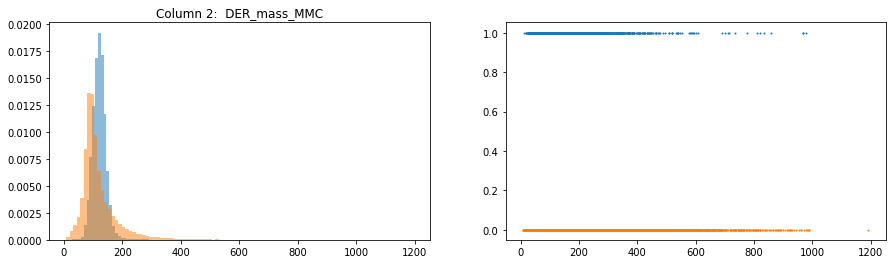

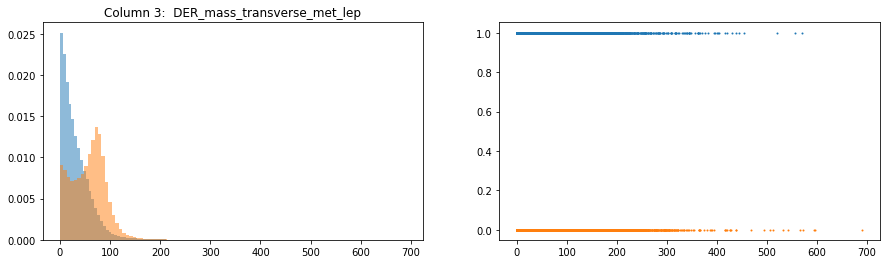

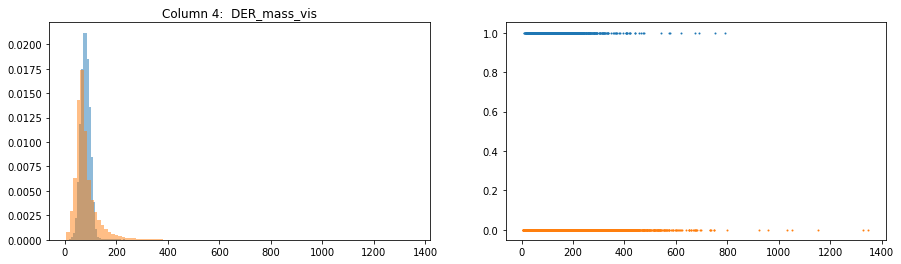

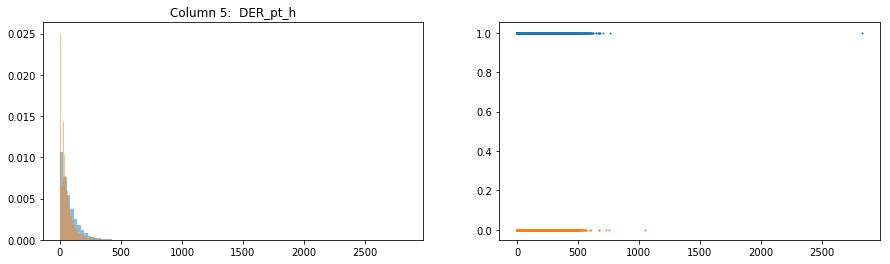

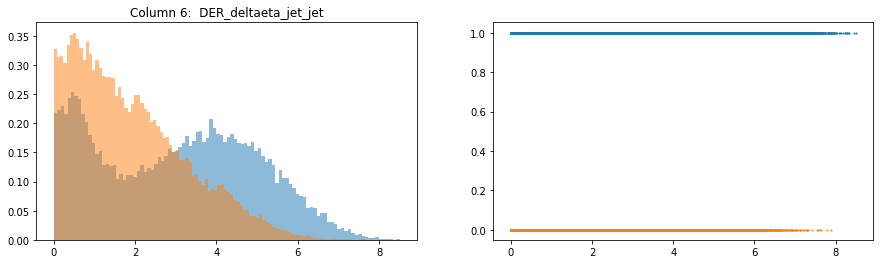

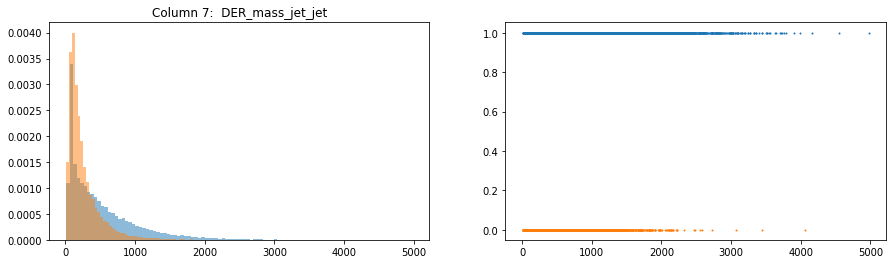

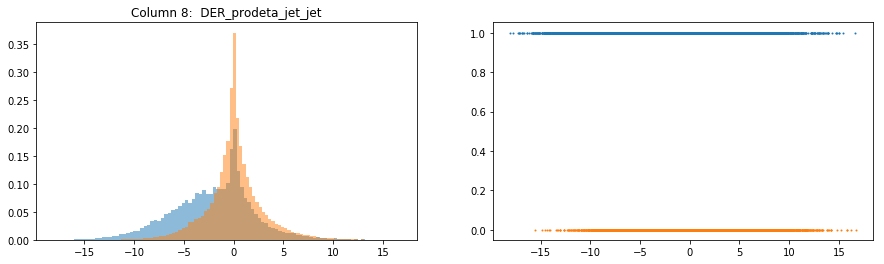

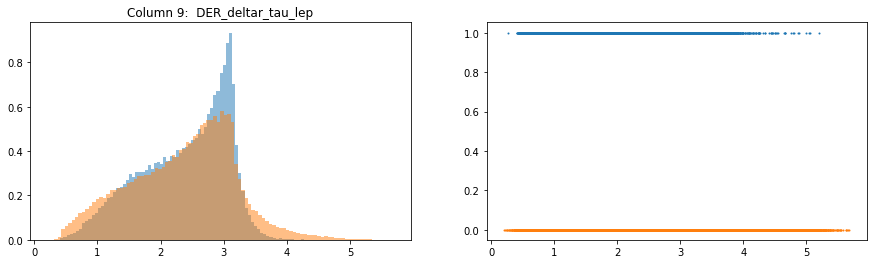

In [75]:
# Get the y from the dataframe
predictions = df['Prediction'].copy()
predictions[predictions == 's'] = 1
predictions[predictions == 'b'] = 0

# Start from column 2 since: column 0 -> Id, column 1 -> Prediction

for i in range(2, 10):
    
    f = plt.figure(figsize=(15,4))
    
    # Histograms
    ax1 = f.add_subplot(121)
    bins_number = 100
    mask_NaNs_s = df_s[df.columns[i]] != -999  # Delete NaN values
    ax1.hist(df_s.loc[mask_NaNs_s, df.columns[i]], bins=bins_number, alpha = 0.5, density=True)
    mask_NaNs_b = df_b[df.columns[i]] != -999
    ax1.hist(df_b.loc[mask_NaNs_b, df.columns[i]], bins=bins_number, alpha = 0.5, density=True)
    # plt.gca().set_yscale('log')
    plt.title('Column ' + str(i) + ':  ' + df.columns[i])
    
    # Scatterplot
    ax2 = f.add_subplot(122)
    mask_NaNs = df[df.columns[i]] != -999  # Delete NaN values
    scatter_x = df.loc[mask_NaNs, df.columns[i]]
    scatter_y = predictions[mask_NaNs]
    ax2.scatter(scatter_x[scatter_y == 1], scatter_y[scatter_y == 1], s=1)
    ax2.scatter(scatter_x[scatter_y == 0], scatter_y[scatter_y == 0], s=1)

In [39]:
# One single plot with interactive x limit

from ipywidgets import FloatRangeSlider, interact

def plot_figure(x_lim):
    plt.figure()
    plt.hist(df_s[df.columns[i]], bins=bins_number, alpha = 0.5, density=True)
    plt.gca().hist(df_b[df.columns[i]], bins=bins_number, alpha = 0.5, density=True)
    # plt.gca().set_yscale('log')
    plt.gca().set_xlim(x_lim)
    plt.title('Column ' + str(i) + ':  ' + df.columns[i])

# Set parameters
i = 5
bins_number = 1000

interact(plot_figure, x_lim=FloatRangeSlider(min=np.min(df[df.columns[i]]), max=np.max(df[df.columns[i]])))

interactive(children=(FloatRangeSlider(value=(708.7497500000001, 2126.2492500000003), description='x_lim', max…

<function __main__.plot_figure(x_lim)>

In [9]:
nans = []
for column_name in df.columns:
    nans.append(df[df[column_name] == -999.0]['Prediction'].count())
#     print(column_name, '\t\t', df[df[column_name] == -999.0]['Prediction'].count())
# nans_number = pd.DataFrame([df.columns, nans])
nans_number = pd.Series(nans)
nans_number

0          0
1          0
2      38114
3          0
4          0
5          0
6     177457
7     177457
8     177457
9          0
10         0
11         0
12         0
13         0
14    177457
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25     99913
26     99913
27     99913
28    177457
29    177457
30    177457
31         0
dtype: int64

## Do your thing crazy machine learning thing here :) ...

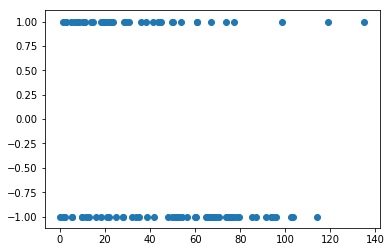

In [10]:
seed = 1
num_row = len(y)
np.random.seed(seed)
all_indices = np.random.permutation(num_row)
indices = all_indices[0:100]
plt.scatter(tX[indices, 1], y[indices])

In [11]:
print(y)
y_zeros = y.copy()
y_zeros[y_zeros == -1] = 0
print(y)
print(y_zeros)

[ 1. -1. -1. ...  1. -1. -1.]
[ 1. -1. -1. ...  1. -1. -1.]
[1. 0. 0. ... 1. 0. 0.]


In [21]:
df.columns[0:10]

Index(['Id', 'Prediction', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep'],
      dtype='object')

In [ ]:
# i = 4
for i in range(2):
    bins_number = 100
    plt.hist(df_s[df.columns[i]], bins=bins_number, alpha = 0.5, density=True)
    plt.gca().hist(df_b[df.columns[i]], bins=bins_number, alpha = 0.5, density=True)
    # plt.gca().set_yscale('log')
    plt.title(df.columns[i])

In [247]:
correlation_coefficients = np.zeros(df.shape[1] - 2)
for i in range(df.shape[1] - 2):
    correlation_coefficients[i] = np.corrcoef(y, df[df.columns[i+2]])[0][1]
correlation_coefficients
corr_coeffs = pd.Series(dict(zip(df.columns[2:-1], correlation_coefficients)))
corr_coeffs

DER_mass_MMC                   0.239149
DER_mass_transverse_met_lep   -0.351428
DER_mass_vis                  -0.014055
DER_pt_h                       0.192526
DER_deltaeta_jet_jet           0.141646
DER_mass_jet_jet               0.191766
DER_prodeta_jet_jet            0.140554
DER_deltar_tau_lep             0.012245
DER_pt_tot                    -0.015287
DER_sum_pt                     0.153236
DER_pt_ratio_lep_tau          -0.195398
DER_met_phi_centrality         0.271752
DER_lep_eta_centrality         0.141346
PRI_tau_pt                     0.235238
PRI_tau_eta                   -0.000943
PRI_tau_phi                   -0.004403
PRI_lep_pt                    -0.031948
PRI_lep_eta                    0.001516
PRI_lep_phi                    0.004125
PRI_met                        0.022466
PRI_met_phi                    0.007475
PRI_met_sumet                  0.135520
PRI_jet_num                    0.133549
PRI_jet_leading_pt             0.157604
PRI_jet_leading_eta            0.150469


In [50]:
from implementations import least_squares
# from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
#     selected_columns = [1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 29]
#     selected_columns = [1, 2, 3, 7, 8, 10, 13, 16, 19, 20, 21, 28]    # 0.73961
#     selected_columns = [1, 2, 3, 7]
    selected_columns = 6
    x_selected = x[:, selected_columns]

    tx = np.c_[np.ones((y.shape[0], 1)), x_selected]
    y[y == -1] = 0
    tx_train = tx[0:100000, :]
    y_train = y[0:100000]
    tx_test = tx[100000:200000, :]
    y_test = y[100000:200000]
    w, mse = least_squares(y_train, tx_train)
    # Predictions and percentage of well classified
    y_test_pred = tx_test @ w
    y_test_pred = threshold(y_test_pred)
    print("Weights:                \t", w)
    print("(part of) y_test:       \t", y_test[0:20])
    print("(part of) y_test_pred:  \t", y_test_pred[0:20])
    print("Total 1s in y_test_pred:\t", np.sum(y_test_pred))
    print("Well classified:", 1 - np.sum(np.abs(y_test - y_test_pred), axis=0) / len(y_test))
    
    
def threshold(y):
    for i, y_i in enumerate(y):
        if y_i > 0.5:
            y[i] = 1
        else:
            y[i] = 0
    return y       

least_square_classification_demo(y, tX)

Weights:                	 [4.45417387e-01 1.46048052e-04]
(part of) y_test:       	 [1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
(part of) y_test_pred:  	 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Total 1s in y_test_pred:	 0.0
Well classified: 0.65666


In [39]:
def scale_columns(X):
    
    min_val = np.min(X[:, 0])
    max_val = np.max(X[:, 0])
    scaled_X = np.reshape(X[:, 0] / (max_val - min_val) - min_val / (max_val - min_val), [-1, 1])
#     scaled_X = np.reshape((X[:, 0] - min_val) / (max_val) - min_val / (max_val), [-1, 1])
    for j in range(1, X.shape[1]):
        min_val = np.min(X[:, j])
        max_val = np.max(X[:, j])
        if min_val != max_val:
            scaled_column = np.reshape(X[:, j] / (max_val - min_val) - min_val / (max_val - min_val), [-1, 1])
#             scaled_column = np.reshape((X[:, j] - min_val) / (max_val) - min_val / (max_val), [-1, 1])
            scaled_X = np.append(scaled_X, scaled_column, axis=1)
        else:
            unscaled_column = np.ones([X.shape[1], 1])
            scaled_X = np.append(scaled_X, unscaled_column, axis=1)
            
    return scaled_X

# A = np.array([[1, 8, 3], [5, 4, 3], [9, 9, 3]])
# print(A)
# scaled_A = scale_columns(A)
# print(scaled_A)
# print(tX)
# scaled_tX = scale_columns(tX)
# print(scaled_tX)

In [6]:
from implementations import least_squares_GD
from implementations import standardize
# from plots import visualization

def least_square_GD_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
#     selected_columns = [5, 6]            # mean&std -> 100 iterations, 0.68687
                                         # min&max  -> 1000 iterations, 0.68643
#     selected_columns = [1, 2, 3, 7]      # mean&std -> 100 iterations, 0.69557
                                         # min&max  -> 1000 iterations, 0.69385
#     selected_columns = [1, 2, 3, 7, 8]   # mean&std -> 500 iterations, 0.70168
                                         # min&max  -> 5000 iterations, 0.69633
    selected_columns = [1, 2, 3, 7, 8, 10, 13, 16, 19, 20, 21, 28] # 200 iterations, gamma 0.5, 0.73961
    x_selected = x[:, selected_columns]
    
    standardize_by_min_max = False
    if standardize_by_min_max:
        # Standardize using min and max...
        x_selected_scaled = scale_columns(x_selected)
    else:
        # ...or mean and standard deviation?
        x_selected_scaled, mean_x, std_x = standardize(x_selected)
        
    tx = np.c_[np.ones((y.shape[0], 1)), x_selected_scaled]
    y[y == -1] = 0
    tx_train = tx[0:100000, :]
    y_train = y[0:100000]
    tx_test = tx[100000:200000, :]
    y_test = y[100000:200000]
    
    initial_w = np.ones(tx_train.shape[1])
    max_iters = 500
    gamma = 0.5
    w, mse = least_squares_GD(y_train, tx_train, initial_w, max_iters, gamma)
    # Predictions and percentage of well classified
    y_test_pred = tx_test @ w
    y_test_pred = threshold(y_test_pred)
    print("Weights:                \t", w)
    print("(part of) y_test:       \t", y_test[0:20])
    print("(part of) y_test_pred:  \t", y_test_pred[0:20])
    print("Total 1s in y_test_pred:\t", np.sum(y_test_pred))
    print("Well classified:", 1 - np.sum(np.abs(y_test - y_test_pred), axis=0) / len(y_test))
    
def threshold(y):
    for i, y_i in enumerate(y):
        if y_i > 0.5:
            y[i] = 1
        else:
            y[i] = 0
    return y

least_square_GD_classification_demo(y, tX)

Current iteration=0, loss=5.114613089367044
Current iteration=100, loss=0.0890993558429216
Current iteration=200, loss=0.08909856853090281
Current iteration=300, loss=0.08909856846606447
Current iteration=400, loss=0.08909856846605109
Weights:                	 [ 3.43168522e-01 -1.32016609e-01 -1.32575189e-01  5.98838938e-02
  1.52567292e-01 -1.65191663e-02 -1.07425074e-01  8.58899152e-02
  1.43619999e-01  2.66014337e-02 -1.41462493e-04 -5.28388844e-02
  4.64555488e-02]
(part of) y_test:       	 [1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
(part of) y_test_pred:  	 [1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.]
Total 1s in y_test_pred:	 23777.0
Well classified: 0.73961


In [15]:
from implementations import least_squares_SGD
from implementations import standardize

def least_square_SGD_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
#     selected_columns = [5, 6]            # mean&std -> 100 iterations, 0.68687
                                         # min&max  -> 1000 iterations, 0.68643
#     selected_columns = [1, 2, 3, 7]      # mean&std -> 100 iterations, 0.69557
                                         # min&max  -> 1000 iterations, 0.69385
#     selected_columns = [1, 2, 3, 7, 8]   # mean&std -> 500 iterations, 0.70168
                                         # min&max  -> 5000 iterations, 0.69633
    selected_columns = [1, 2, 3, 7, 8, 10, 13, 16, 19, 20, 21, 28] # 200 iterations, gamma 0.5, 0.73961
    x_selected = x[:, selected_columns]
    
    standardize_by_min_max = False
    if standardize_by_min_max:
        # Standardize using min and max...
        x_selected_scaled = scale_columns(x_selected)
    else:
        # ...or mean and standard deviation?
        x_selected_scaled, mean_x, std_x = standardize(x_selected)
        
    tx = np.c_[np.ones((y.shape[0], 1)), x_selected_scaled]
    y[y == -1] = 0
    tx_train = tx[0:100000, :]
    y_train = y[0:100000]
    tx_test = tx[100000:200000, :]
    y_test = y[100000:200000]
    
    initial_w = np.ones(tx_train.shape[1])
    max_iters = 1000
    gamma = 0.01
    w, mse = least_squares_SGD(y_train, tx_train, initial_w, max_iters, gamma)
    # Predictions and percentage of well classified
    y_test_pred = tx_test @ w
    y_test_pred = threshold(y_test_pred)
    print("Weights:                \t", w)
    print("(part of) y_test:       \t", y_test[0:20])
    print("(part of) y_test_pred:  \t", y_test_pred[0:20])
    print("Total 1s in y_test_pred:\t", np.sum(y_test_pred))
    print("Well classified:", 1 - np.sum(np.abs(y_test - y_test_pred), axis=0) / len(y_test))

least_square_SGD_classification_demo(y, tX)

Current iteration=0, loss=13.794514494634504
Current iteration=100, loss=0.6617206734447473
Current iteration=200, loss=0.17744422624060796
Current iteration=300, loss=0.15160841126171581
Current iteration=400, loss=0.10713855570913187
Current iteration=500, loss=0.10232851232519861
Current iteration=600, loss=0.0997061666844351
Current iteration=700, loss=0.10292964804151677
Current iteration=800, loss=0.10123661267245804
Current iteration=900, loss=0.09504761969055668
Weights:                	 [ 0.32978801 -0.05414723 -0.17554501  0.17021499  0.21452063 -0.00635913
 -0.04512531  0.16216273  0.06324526  0.02112996  0.02404255 -0.07183285
  0.0604299 ]
(part of) y_test:       	 [1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
(part of) y_test_pred:  	 [1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
Total 1s in y_test_pred:	 18605.0
Well classified: 0.7164699999999999


In [127]:
t = 800
np.exp(t)/(1+np.exp(t))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


nan

In [8]:
from implementations import logistic_regression

def logistic_regression_classification_demo(y, x):
    
#     selected_columns = [5]
#     selected_columns = [5, 6]            # mean&std -> 1000 iterations, gamma 0.00001, 0.68178
                                         # min&max  -> 10000 iterations, gamma 0.00001, 0.68009
#     selected_columns = [1, 2, 3, 7]      # mean&std -> ? iterations, ?
                                         # min&max  -> ? iterations, ?
#     selected_columns = [1, 2, 3, 7, 8]   # mean&std -> ? iterations, ?
                                         # min&max  -> ? iterations, ?
    selected_columns = [1, 2, 3, 7, 8, 10, 13, 16, 19, 20, 21, 28]
    x_selected = x[:, selected_columns]
    
    standardize_by_min_max = False
    if standardize_by_min_max:
        # Standardize using min and max...
        x_selected_scaled = scale_columns(x_selected)
    else:
        # ...or mean and standard deviation?
        x_selected_scaled, mean_x, std_x = standardize(x_selected)
        
    tx = np.c_[np.ones((y.shape[0], 1)), x_selected_scaled]
    y[y == -1] = 0
    tx_train = tx[0:100000, :]
    y_train = y[0:100000]
    tx_test = tx[100000:200000, :]
    y_test = y[100000:200000]
    
    initial_w = np.ones(tx_train.shape[1])
    max_iters = 500
    gamma = 2e-5
    w, mse = logistic_regression(y_train, tx_train, initial_w, max_iters, gamma)
    # Predictions and percentage of well classified
    y_test_pred = tx_test @ w
    y_test_pred = threshold(y_test_pred)
    print("Weights:                \t", w)
    print("(part of) y_test:       \t", y_test[0:20])
    print("(part of) y_test_pred:  \t", y_test_pred[0:20])
    print("Total 1s in y_test_pred:\t", np.sum(y_test_pred))
    print("Well classified:", 1 - np.sum(np.abs(y_test - y_test_pred), axis=0) / len(y_test))
    
logistic_regression_classification_demo(y, tX)

Current iteration=0, loss=208290.73635566453
Current iteration=100, loss=51878.981896633595
Current iteration=200, loss=51845.57049888032
Current iteration=300, loss=51844.62291082565
Current iteration=400, loss=51844.59438988551
Weights:                	 [-0.88680519 -0.67254845 -1.07459867  0.64694518  1.16028069 -0.102476
 -0.84890325  0.45984816  1.00947549 -0.01770871 -0.00264606 -0.30717718
  0.22813325]
(part of) y_test:       	 [1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
(part of) y_test_pred:  	 [1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
Total 1s in y_test_pred:	 13275.0
Well classified: 0.71409


In [9]:
from implementations import logistic_regression_SGD

def logistic_regression_SDG_classification_demo(y, x):
    
#     selected_columns = [5]
#     selected_columns = [5, 6]            # mean&std -> 1000 iterations, gamma 0.00001, 0.68178
                                         # min&max  -> 10000 iterations, gamma 0.00001, 0.68009
#     selected_columns = [1, 2, 3, 7]      # mean&std -> ? iterations, ?
                                         # min&max  -> ? iterations, ?
#     selected_columns = [1, 2, 3, 7, 8]   # mean&std -> ? iterations, ?
                                         # min&max  -> ? iterations, ?
    selected_columns = [1, 2, 3, 7, 8, 10, 13, 16, 19, 20, 21, 28]
    x_selected = x[:, selected_columns]
    
    standardize_by_min_max = False
    if standardize_by_min_max:
        # Standardize using min and max...
        x_selected_scaled = scale_columns(x_selected)
    else:
        # ...or mean and standard deviation?
        x_selected_scaled, mean_x, std_x = standardize(x_selected)
        
    tx = np.c_[np.ones((y.shape[0], 1)), x_selected_scaled]
    y[y == -1] = 0
    tx_train = tx[0:100000, :]
    y_train = y[0:100000]
    tx_test = tx[100000:200000, :]
    y_test = y[100000:200000]
    
    initial_w = np.ones(tx_train.shape[1])
    max_iters = 2000
    gamma = 0.01
    w, mse = logistic_regression_SGD(y_train, tx_train, initial_w, max_iters, gamma)
    # Predictions and percentage of well classified
    y_test_pred = tx_test @ w
    y_test_pred = threshold(y_test_pred)
    print("Weights:                \t", w)
    print("(part of) y_test:       \t", y_test[0:20])
    print("(part of) y_test_pred:  \t", y_test_pred[0:20])
    print("Total 1s in y_test_pred:\t", np.sum(y_test_pred))
    print("Well classified:", 1 - np.sum(np.abs(y_test - y_test_pred), axis=0) / len(y_test))
    
logistic_regression_SDG_classification_demo(y, tX)

Current iteration=0, loss=208290.73635566453
Current iteration=100, loss=184250.09750783234
Current iteration=200, loss=157390.50991678925
Current iteration=300, loss=133256.67194520828
Current iteration=400, loss=100648.52864307635
Current iteration=500, loss=91259.71629889986
Current iteration=600, loss=82021.75535180529
New gamma:  0.005
Current iteration=700, loss=77405.6093703332
Current iteration=800, loss=75274.04898252117
Current iteration=900, loss=75218.94978265851
Current iteration=1000, loss=75648.90727715802
Current iteration=1100, loss=77802.7569424086
Current iteration=1200, loss=78649.82152397752
Current iteration=1300, loss=79446.80790895241
New gamma:  0.0025
Current iteration=1400, loss=80245.1126055477
Current iteration=1500, loss=80519.39691940417
Current iteration=1600, loss=80703.7059086189
Current iteration=1700, loss=80836.86345882787
Current iteration=1800, loss=81215.32642108461
Current iteration=1900, loss=81931.68923106774
Weights:                	 [-2.0666

## Generate predictions and save ouput in csv format for submission:

In [10]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [31]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)